In [1]:
# Dependencies
import pandas as pd
%matplotlib notebook 
import matplotlib.pyplot as plt

In [2]:
# Import Energy and community area per capita income csv files

# Electricity csv import
energy_file = "Electricity_Only_some_Housing.csv"
electricity_df = pd.read_csv(energy_file)

# Check energy_df
electricity_df.drop(columns='Unnamed: 0', inplace=True)
electricity_df.head()

,COMMUNITY AREA NAME,BUILDING TYPE,BUILDING_SUBTYPE,KWH JANUARY 2010,KWH FEBRUARY 2010,KWH MARCH 2010,KWH APRIL 2010,KWH MAY 2010,KWH JUNE 2010,KWH JULY 2010,...,KWH 1ST QUARTILE 2010,KWH 2ND QUARTILE 2010,KWH 3RD QUARTILE 2010,AVERAGE HOUSESIZE,OCCUPIED UNITS,OCCUPIED UNITS PERCENTAGE,RENTER-OCCUPIED HOUSING UNITS,RENTER-OCCUPIED HOUSING PERCENTAGE,OCCUPIED HOUSING UNITS,TOTAL POPULATION
0,Archer Heights,Residential,Multi < 7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.87,23.0,0.9582,9.0,0.3910,23.0,89.0
1,Ashburn,Residential,Multi 7+,7334.0,7741.0,4214.0,4284.0,2518.0,4273.0,4566.0,...,8886.0,21363.0,51815.0,1.81,62.0,0.9254,50.0,0.8059,62.0,112.0
2,Auburn Gresham,Commercial,Multi < 7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.00,34.0,0.7082,23.0,0.6759,34.0,102.0
3,Austin,Commercial,Multi < 7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.95,41.0,0.7321,32.0,0.7800,41.0,121.0
4,Austin,Commercial,Multi < 7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.26,19.0,0.8261,11.0,0.5790,19.0,62.0


In [3]:
# Energy csv import
community_income_file = "community_and_per_capita_income.csv"
income_df = pd.read_csv(community_income_file)

# Check income_df
income_df.head()

,Unnamed: 0,COMMUNITY AREA NAME,PER CAPITA INCOME
0,0,Rogers Park,23714
1,1,West Ridge,21375
2,2,Uptown,32355
3,3,Lincoln Square,35503
4,4,North Center,51615


In [4]:
# Clean up income_df
income_df.drop(['Unnamed: 0'], axis=1, inplace=True)

# Check cleaned income_df
income_df.head()

,COMMUNITY AREA NAME,PER CAPITA INCOME
0,Rogers Park,23714
1,West Ridge,21375
2,Uptown,32355
3,Lincoln Square,35503
4,North Center,51615


In [12]:
# Create separate dataframe to house electricity data

electricity_df = energy_df[['COMMUNITY AREA NAME', 'BUILDING TYPE',
                            'BUILDING_SUBTYPE', 'KWH JANUARY 2010',
                            'KWH FEBRUARY 2010', 'KWH MARCH 2010',
                            'KWH APRIL 2010', 'KWH MAY 2010',
                            'KWH JUNE 2010', 'KWH JULY 2010',
                            'KWH AUGUST 2010', 'KWH SEPTEMBER 2010',
                            'KWH OCTOBER 2010', 'KWH NOVEMBER 2010',
                            'KWH DECEMBER 2010', 'TOTAL KWH',
                            'ELECTRICITY ACCOUNTS', 'ZERO KWH ACCOUNTS',
                            'KWH TOTAL SQFT', 'KWH MEAN 2010',
                            'KWH STANDARD DEVIATION 2010', 'KWH MINIMUM 2010',
                            'KWH MAXIMUM 2010', 'KWH 1ST QUARTILE 2010', 
                            'KWH 2ND QUARTILE 2010', 'KWH 3RD QUARTILE 2010', 
                            'AVERAGE HOUSESIZE', 'OCCUPIED UNITS',
                            'OCCUPIED UNITS PERCENTAGE', 'RENTER-OCCUPIED HOUSING UNITS',
                            'RENTER-OCCUPIED HOUSING PERCENTAGE', 'OCCUPIED HOUSING UNITS',
                            'TOTAL POPULATION']]

# Check electricity_df
electricity_df.head()

# Save separate csv file of electricity data
electricity_df.to_csv("Electricity_Only_some_Housing.csv")


In [5]:
# Recording original length of electricity_df before cleaning
len(electricity_df)

67051

In [6]:
# Clean up electricity_df
# Drop commercial building types

residential_electricity = electricity_df.set_index('BUILDING TYPE')
residential_electricity.drop(index="Commercial", inplace=True)

# Record new length of residential_electricity DataFrame 
len(residential_electricity)

49866

In [7]:
# Continue cleaning electricity data
# Reset index of residential_electricity
residential_electricity.reset_index(inplace=True)

# Check residential_electricity
residential_electricity.head()

,BUILDING TYPE,COMMUNITY AREA NAME,BUILDING_SUBTYPE,KWH JANUARY 2010,KWH FEBRUARY 2010,KWH MARCH 2010,KWH APRIL 2010,KWH MAY 2010,KWH JUNE 2010,KWH JULY 2010,...,KWH 1ST QUARTILE 2010,KWH 2ND QUARTILE 2010,KWH 3RD QUARTILE 2010,AVERAGE HOUSESIZE,OCCUPIED UNITS,OCCUPIED UNITS PERCENTAGE,RENTER-OCCUPIED HOUSING UNITS,RENTER-OCCUPIED HOUSING PERCENTAGE,OCCUPIED HOUSING UNITS,TOTAL POPULATION
0,Residential,Archer Heights,Multi < 7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.87,23.0,0.9582,9.0,0.3910,23.0,89.0
1,Residential,Ashburn,Multi 7+,7334.0,7741.0,4214.0,4284.0,2518.0,4273.0,4566.0,...,8886.0,21363.0,51815.0,1.81,62.0,0.9254,50.0,0.8059,62.0,112.0
2,Residential,Austin,Multi 7+,2461.0,4888.0,2893.0,2737.0,2350.0,3037.0,3874.0,...,41497.0,41497.0,41497.0,2.93,27.0,0.8710,27.0,1.0000,27.0,79.0
3,Residential,Austin,Multi 7+,0.0,0.0,0.0,0.0,0.0,511.0,904.0,...,8596.0,8596.0,8596.0,3.82,22.0,0.6667,16.0,0.7270,22.0,84.0
4,Residential,Austin,Multi < 7,96.0,202.0,1837.0,1118.0,669.0,889.0,812.0,...,1344.0,4051.0,6134.0,0.00,0.0,NaN,0.0,NaN,0.0,0.0


In [8]:
# Create new DataFrame of just community name, 'KWH MEAN 2010', info on residence
kwh_mean_df = residential_electricity[['COMMUNITY AREA NAME', 'KWH MEAN 2010']]

print(f"Number of electricity readings {len(kwh_mean_df)}")

# Clean up data by dropping NaN values
kwh_mean_df.dropna(inplace=True)

print(f"Number of electricity readings after dropping NaN, {len(kwh_mean_df)}")

Number of electricity readings 49866
Number of electricity readings after dropping NaN, 49550


C:\Users\oimar\Miniconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [9]:
# Merge per capita income data from income_df to kwh_mean_df
income_kwh_mean = income_df.merge(kwh_mean_df, how='outer', on='COMMUNITY AREA NAME')

# Check merged income_kwh_mean
income_kwh_mean.head()

,COMMUNITY AREA NAME,PER CAPITA INCOME,KWH MEAN 2010
0,Rogers Park,23714.0,8252.00
1,Rogers Park,23714.0,30417.00
2,Rogers Park,23714.0,11812.33
3,Rogers Park,23714.0,20669.00
4,Rogers Park,23714.0,29135.60


In [10]:
# Group income_kwh_mean by 'COMMUNITY AREA NAME'
grp_income_kwh_mean = income_kwh_mean.groupby('COMMUNITY AREA NAME').mean()

# Check grouped DataFrame, income_kwh_mean
grp_income_kwh_mean.head()

,PER CAPITA INCOME,KWH MEAN 2010
COMMUNITY AREA NAME,,
Albany Park,20355.0,12130.394890
Archer Heights,16145.0,11321.416536
Armour Square,16942.0,20355.596816
Ashburn,22078.0,10399.940717
Auburn Gresham,16022.0,11915.077123


In [11]:
# Reset index of grp_income_kwh_mean
grp_income_kwh_mean.reset_index()

# Find min and max of Per CAPITA INCOME
grp_income_kwh_mean_sum = grp_income_kwh_mean.describe()
grp_income_kwh_mean_sum

,PER CAPITA INCOME,KWH MEAN 2010
count,77.000000,7.700000e+01
mean,25106.740260,4.540935e+04
std,14952.672297,1.740912e+05
min,8535.000000,8.814124e+03
25%,15467.000000,9.966186e+03
50%,20489.000000,1.149445e+04
75%,29026.000000,1.545234e+04
max,87163.000000,1.431448e+06


In [12]:
len(grp_income_kwh_mean)

79

In [13]:
# Create bins to group results into per capita income brackets
bins = [0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000]

# Create names for the bins
incomes = ["0 to 10k", "10k to 20k", "20 to 30k", "30 to 40k",
           "40 to 50k", "50 to 60k", "60 to 70k", "70 to 80k",
           "80 to 90k"]

In [14]:
# Slice grp_income_kwh_mea and place it into bins
# Place data series into a new column inside of grp_income_kwh_mean
grp_income_kwh_mean['PER CAPITA INCOME GROUPS'] = pd.cut(grp_income_kwh_mean["PER CAPITA INCOME"], bins, labels=incomes)

# Check grp_income_kwh_mean with added per capita income groups
grp_income_kwh_mean['KWH MEAN 2010'].describe()

count    7.700000e+01
mean     4.540935e+04
std      1.740912e+05
min      8.814124e+03
25%      9.966186e+03
50%      1.149445e+04
75%      1.545234e+04
max      1.431448e+06
Name: KWH MEAN 2010, dtype: float64

In [15]:
# Create a GroupBy object based on "View Group"
per_capita_income_grp = grp_income_kwh_mean.groupby("PER CAPITA INCOME GROUPS").mean()


# Check per_capita_income_grp DataFrame
per_capita_income_grp = per_capita_income_grp[['KWH MEAN 2010']]

per_capita_income_grp.reset_index(inplace=True)
per_capita_income_grp

,PER CAPITA INCOME GROUPS,KWH MEAN 2010
0,0 to 10k,82570.041515
1,10k to 20k,11837.503580
2,20 to 30k,14492.798279
3,30 to 40k,18120.745759
4,40 to 50k,189991.172692
5,50 to 60k,14686.477149
6,60 to 70k,829230.905441
7,70 to 80k,26873.208014
8,80 to 90k,144505.345102


In [16]:
# Check count per income bracket
count_per_capita_income = grp_income_kwh_mean.groupby("PER CAPITA INCOME GROUPS").count()

count_per_capita_income

,PER CAPITA INCOME,KWH MEAN 2010
PER CAPITA INCOME GROUPS,,
0 to 10k,2,2
10k to 20k,34,34
20 to 30k,23,22
30 to 40k,9,9
40 to 50k,3,3
50 to 60k,2,1
60 to 70k,2,2
70 to 80k,1,1
80 to 90k,1,1


<IPython.core.display.Javascript object>


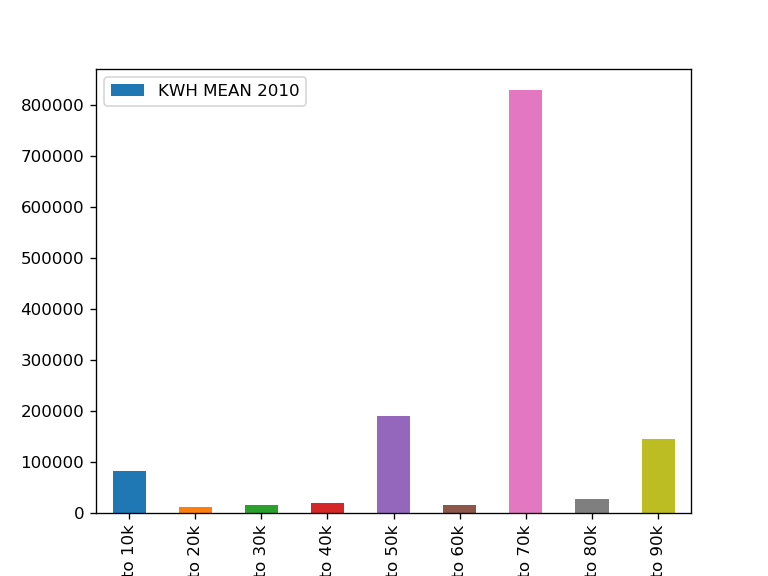

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

In [17]:
# Create bar plot

# x values
x = 'PER CAPITA INCOME GROUPS'
y = 'KWH MEAN 2010'
per_capita_income_grp.plot(kind='bar', x=x, y=y)

plt.tight_layout